# Initial Data Exploration

***

## 1. Question

Can one predict delays in US domestic flights with data regarding origin and destination, taxi times, departure delay, seasonal features (period of the year, day of the week...), etc?

**Import Required Libraries**

In [1]:
import pandas as pd
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as md
import matplotlib.ticker as ticker
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

**Loading data**

In [2]:
# import all csv files into the same DataFrame
path = '../'
all_files = glob.iglob(os.path.join(path, '*.csv')) # gather all 12 csv files, one per month
df_from_each_file = (pd.read_csv(f) for f in all_files) # read files
concatenated_df = pd.concat(df_from_each_file) # concatenate all 12 dataframes

This dataset is composed by the following variables:

* YEAR 2019
* MONTH 1-12
* DAY_OF_MONTH 1-31
* DAY_OF_WEEK 1 (Monday) - 7 (Sunday)
* FL_DATE Flight Date (yyyymmdd)
* ORIGIN Origin Airport
* DEST Destination Airport
* DEP_TIME actual departure time (local, hhmm)
* DEP_DELAY Difference in minutes between scheduled and actual departure time. Early departures show negative numbers.
* TAXI_OUT Taxi Out Time, in Minutes
* TAXI_IN Taxi In Time, in Minutes
* ARR_TIME actual arrival time (local, hhmm)
* ARR_DELAY Difference in minutes between scheduled and actual arrival time. Early arrivals show negative numbers.
* CANCELLED Cancelled Flight Indicator (1=Yes)
* ACTUAL_ELAPSED_TIME Elapsed Time of Flight, in Minutes
* AIR_TIME Flight Time, in Minutes
* DISTANCE Distance between airports (miles)
* CARRIER_DELAY Carrier Delay, in Minutes
* WEATHER_DELAY Weather Delay, in Minutes
* NAS_DELAY National Air System Delay, in Minutes
* SECURITY DELAY Security Delay, in Minutes
* LATE_AIRCRAFT_DELAY Late Aircraft Delay, in Minutes

**Initial data wrangling**

In [3]:
# drop 'unnamed' column
df_aux = concatenated_df.drop(concatenated_df.filter(regex='Unname'), axis=1)

In [4]:
df_clean1 = df_aux.drop_duplicates() # delete all duplicates
df_clean = df_clean1.dropna(axis=0, how='all') # delete NaN rows

In [5]:
len(df_clean)

7382815

Using a *sample size calculator* with inputs **margin error** 1%, **confidence level** 99%, **population size** 7422037 (given by the above instruction), and **likely sample population** 50%, one gets that a sample of 16604 is needed, which in our case means sampling ~0.22% the size of the data set. We will get a sample with ~0.25% the size of the data set:

In [6]:
df = df_clean.sample(frac = 0.025)

In [7]:
len(df)

184570

We have successfully loaded the data and cleaned it superficially. Now let's look at the type of data we have to make a more in-depth analysis.

In [8]:
df.dtypes

YEAR                     int64
MONTH                    int64
DAY_OF_MONTH             int64
DAY_OF_WEEK              int64
FL_DATE                 object
ORIGIN                  object
DEST                    object
DEP_TIME               float64
DEP_DELAY              float64
TAXI_OUT               float64
TAXI_IN                float64
ARR_TIME               float64
ARR_DELAY              float64
CANCELLED              float64
ACTUAL_ELAPSED_TIME    float64
AIR_TIME               float64
DISTANCE               float64
CARRIER_DELAY          float64
WEATHER_DELAY          float64
NAS_DELAY              float64
SECURITY_DELAY         float64
LATE_AIRCRAFT_DELAY    float64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184570 entries, 68920 to 3868
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 184570 non-null  int64  
 1   MONTH                184570 non-null  int64  
 2   DAY_OF_MONTH         184570 non-null  int64  
 3   DAY_OF_WEEK          184570 non-null  int64  
 4   FL_DATE              184570 non-null  object 
 5   ORIGIN               184570 non-null  object 
 6   DEST                 184570 non-null  object 
 7   DEP_TIME             182285 non-null  float64
 8   DEP_DELAY            182285 non-null  float64
 9   TAXI_OUT             182192 non-null  float64
 10  TAXI_IN              182092 non-null  float64
 11  ARR_TIME             182092 non-null  float64
 12  ARR_DELAY            181701 non-null  float64
 13  CANCELLED            184570 non-null  float64
 14  ACTUAL_ELAPSED_TIME  181701 non-null  float64
 15  AIR_TIME       

So we have 170401 records against 22 columns. Non-null values range from 32539 to the total 170401, depending on the column.
The data types are float64, int64 and object.

In [10]:
df.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,ORIGIN,DEST,DEP_TIME,DEP_DELAY,TAXI_OUT,...,ARR_DELAY,CANCELLED,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
68920,2019,11,8,5,2019-11-08,RDU,BOS,1734.0,0.0,15.0,...,7.0,0.0,121.0,101.0,612.0,NaN,NaN,NaN,NaN,NaN
546467,2019,1,25,5,2019-01-25,DEN,CVG,603.0,3.0,16.0,...,-4.0,0.0,155.0,129.0,1069.0,NaN,NaN,NaN,NaN,NaN
128232,2019,3,25,1,2019-03-25,SEA,LAX,2159.0,29.0,30.0,...,39.0,0.0,180.0,141.0,954.0,29.0,0.0,10.0,0.0,0.0
257264,2019,5,16,4,2019-05-16,CVG,MDW,1621.0,16.0,8.0,...,11.0,0.0,60.0,48.0,249.0,NaN,NaN,NaN,NaN,NaN
68501,2019,2,16,6,2019-02-16,IAD,JFK,555.0,-5.0,10.0,...,-28.0,0.0,60.0,43.0,228.0,NaN,NaN,NaN,NaN,NaN


In [11]:
df.isna().sum() # checking for NaN values

YEAR                        0
MONTH                       0
DAY_OF_MONTH                0
DAY_OF_WEEK                 0
FL_DATE                     0
ORIGIN                      0
DEST                        0
DEP_TIME                 2285
DEP_DELAY                2285
TAXI_OUT                 2378
TAXI_IN                  2478
ARR_TIME                 2478
ARR_DELAY                2869
CANCELLED                   0
ACTUAL_ELAPSED_TIME      2869
AIR_TIME                 2869
DISTANCE                    0
CARRIER_DELAY          149552
WEATHER_DELAY          149552
NAS_DELAY              149552
SECURITY_DELAY         149552
LATE_AIRCRAFT_DELAY    149552
dtype: int64

In [12]:
(df.isna().sum()/len(df))*100 # percentage of NaN per column in the whole dataframe

YEAR                    0.000000
MONTH                   0.000000
DAY_OF_MONTH            0.000000
DAY_OF_WEEK             0.000000
FL_DATE                 0.000000
ORIGIN                  0.000000
DEST                    0.000000
DEP_TIME                1.238013
DEP_DELAY               1.238013
TAXI_OUT                1.288400
TAXI_IN                 1.342580
ARR_TIME                1.342580
ARR_DELAY               1.554424
CANCELLED               0.000000
ACTUAL_ELAPSED_TIME     1.554424
AIR_TIME                1.554424
DISTANCE                0.000000
CARRIER_DELAY          81.027253
WEATHER_DELAY          81.027253
NAS_DELAY              81.027253
SECURITY_DELAY         81.027253
LATE_AIRCRAFT_DELAY    81.027253
dtype: float64

We note that the columns YEAR, MONTH, DAY_OF_MONTH and DAY_OF_WEEK are redundant, since we can simply keep the column FL_DATE transforming it to DateTime. Then, using **Series.dt** for FL_DATE we can obtain the following (among others):
* **dt.year** returns the year of the date time.
* **dt.month** returns the month of the date time.
* **dt.day** returns the day of the date time.
* **dt.quarter** returns the quarter of the date time.
* **dt.dayofweek** returns the day of the week of the date time.
* **dt.weekday_name** returns the name of the day in a week of the date time.

In [13]:
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])

In [14]:
cols = ['YEAR','MONTH','DAY_OF_MONTH','DAY_OF_WEEK']
data = df.drop(cols, axis=1)
data.head()

,FL_DATE,ORIGIN,DEST,DEP_TIME,DEP_DELAY,TAXI_OUT,TAXI_IN,ARR_TIME,ARR_DELAY,CANCELLED,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
68920,2019-11-08,RDU,BOS,1734.0,0.0,15.0,5.0,1935.0,7.0,0.0,121.0,101.0,612.0,NaN,NaN,NaN,NaN,NaN
546467,2019-01-25,DEN,CVG,603.0,3.0,16.0,10.0,1038.0,-4.0,0.0,155.0,129.0,1069.0,NaN,NaN,NaN,NaN,NaN
128232,2019-03-25,SEA,LAX,2159.0,29.0,30.0,9.0,59.0,39.0,0.0,180.0,141.0,954.0,29.0,0.0,10.0,0.0,0.0
257264,2019-05-16,CVG,MDW,1621.0,16.0,8.0,4.0,1621.0,11.0,0.0,60.0,48.0,249.0,NaN,NaN,NaN,NaN,NaN
68501,2019-02-16,IAD,JFK,555.0,-5.0,10.0,7.0,655.0,-28.0,0.0,60.0,43.0,228.0,NaN,NaN,NaN,NaN,NaN


So far, we are unfimilar with the data and its features, and what they are representing. In real world, we come acroos to many different problems where we don't know the meanining of features but to imagine in our minds. What we must know is the distribution of data like **variance**, **standart deviation**, **number of sample** or **max / min** values. These type of information helps to understand the data, how normally distributed it is, or it has skewed distribution.

In [15]:
data.describe()

,DEP_TIME,DEP_DELAY,TAXI_OUT,TAXI_IN,ARR_TIME,ARR_DELAY,CANCELLED,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
count,182285.000000,182285.000000,182192.000000,182092.000000,182092.000000,181701.000000,184570.000000,181701.000000,181701.000000,184570.000000,35018.000000,35018.000000,35018.000000,35018.000000,35018.000000
mean,1335.927751,11.242889,17.415842,7.749374,1464.129555,5.744316,0.013068,136.792478,111.638257,802.218649,21.167285,4.034925,17.004055,0.116626,27.804158
std,507.877987,50.613292,10.103702,6.201584,543.170877,52.681265,0.113567,72.666247,70.618507,593.839637,66.664745,35.582129,40.668253,6.508828,55.484268
min,1.000000,-48.000000,1.000000,1.000000,1.000000,-75.000000,0.000000,17.000000,8.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,914.000000,-5.000000,11.000000,4.000000,1047.000000,-15.000000,0.000000,84.000000,60.000000,369.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1328.000000,-2.000000,15.000000,6.000000,1505.000000,-6.000000,0.000000,119.000000,93.000000,640.000000,0.000000,0.000000,2.000000,0.000000,3.000000
75%,1747.000000,7.000000,20.000000,9.000000,1918.000000,8.000000,0.000000,167.000000,141.000000,1035.000000,18.000000,0.000000,20.000000,0.000000,34.000000
max,2400.000000,2064.000000,181.000000,177.000000,2400.000000,2050.000000,1.000000,708.000000,681.000000,5095.000000,1553.000000,1575.000000,1231.000000,1078.000000,1514.000000


The summary statistics help us understanding whether or not we need standardization (or normalization) before visualization, feature selection or classificaiton.

Before moving forward to the data analysis of features, let's have a quick look at the labels we are going to use to predict delay. First, let's understand what data we have in 'DEP_DELAY' and 'ARR_DELAY'. For instance, a flight can arrive on time (or before expected) even if the departure was delayed; are there records like these in the data? Yes:

In [16]:
data[(data['DEP_DELAY'] > 0.0) & (data['ARR_DELAY'] <= 0.0)].count()

FL_DATE                17707
ORIGIN                 17707
DEST                   17707
DEP_TIME               17707
DEP_DELAY              17707
TAXI_OUT               17707
TAXI_IN                17707
ARR_TIME               17707
ARR_DELAY              17707
CANCELLED              17707
ACTUAL_ELAPSED_TIME    17707
AIR_TIME               17707
DISTANCE               17707
CARRIER_DELAY              0
WEATHER_DELAY              0
NAS_DELAY                  0
SECURITY_DELAY             0
LATE_AIRCRAFT_DELAY        0
dtype: int64

**Note regarding some of the columns in the data set related with the flights delays**:
1. How are flight delays calculated?
A flight is considered delayed when it arrived 15 or more minutes than the schedule. Arrival performance is based on arrival at the gate. Departure performance is based on departure from the gate.
2. How do we know the reason for a flight being late or cancelled?
Since June 2003, the airlines that report on-time data also report the causes of delays and cancellations to the Bureau of Transportation Statistics. The airlines report the causes of delay in broad categories that were created by the Air Carrier On-Time Reporting Advisory Committee. The categories are *Air Carrier*, *National Aviation System*, *Weather*, *Late-Arriving Aircraft* and *Security*. The causes of cancellation are the same, except there is no late-arriving aircraft category. How are these categories defined?
* Air Carrier: The cause of the cancellation or delay was due to circumstances within the airline's control (e.g. maintenance or crew problems, aircraft cleaning, baggage loading, fueling, etc.).
* Extreme Weather: Significant meteorological conditions (actual or forecasted) that, in the judgment of the carrier, delays or prevents the operation of a flight such as tornado, blizzard or hurricane.
* National Aviation System (NAS): Delays and cancellations attributable to the national aviation system that refer to a broad set of conditions, such as non-extreme weather conditions, airport operations, heavy traffic volume, and air traffic control.
* Late-arriving aircraft: A previous flight with same aircraft arrived late, causing the present flight to depart late.
* Security: Delays or cancellations caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.

Note that **multiple causes** of delay can be assigned to one delayed flight. We are going to store the data of the *delayed* flights at arrival.

In [17]:
delayed = df_clean[df_clean['ARR_DELAY'] >= 15]
len(delayed)

1389253

Flights that were delayed at arrival were not cancelled. However, flights accumulating delay at departure might have been cancelled.

In [18]:
print(len(df_clean[(df_clean['ARR_DELAY'] > 0) & (df_clean['CANCELLED'] != 0.0)]))
print(len(df_clean[(df_clean['DEP_DELAY'] > 0) & (df_clean['CANCELLED'] != 0.0)]))

0
3212


In [19]:
print(len(df_clean[(df_clean['DEP_DELAY'] > 0) & (df_clean['CANCELLED'] == 0.0)]))

2518280


From the 2518280 flights that were delayed at departure, only 3212 (<0.5%) were cancelled.

## 2. Visualization

For data visualization, we are going to use seaborn plots. Violin and Swarm plots usually help us to understand data easily.

First, let's plot a histogram that shows the distribution of delay at arrival in the dataset

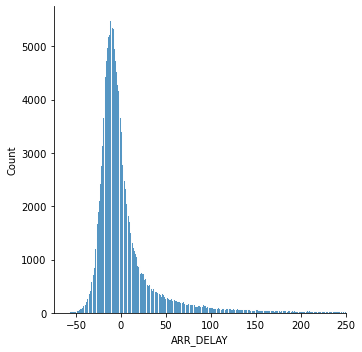

In [20]:
arrival_delay = data['ARR_DELAY'].dropna()
sns.displot(arrival_delay)
plt.xlim(-75, 250)
plt.show()

Let us analyze the three main festivities in the USA: the 4th of July, Thanksgiving and Christmas. All of them show relatively low delays, due to the lower demand on flights, but the previous and subsequent days had delays relatively high compared to the rest of the series.
Apart from this, other seasonal delays can be observed in the following time series:

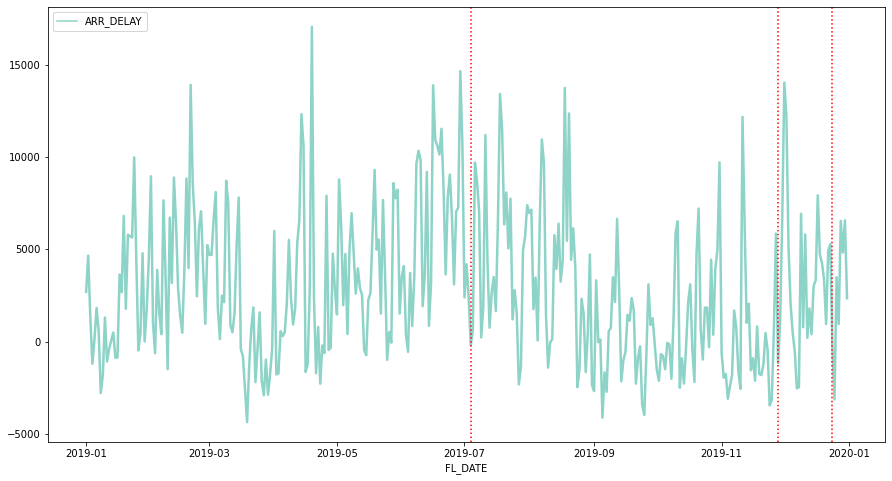

In [21]:
date_delay = data[['FL_DATE', 'ARR_DELAY']]
date_delay = date_delay.groupby(by = 'FL_DATE').sum()
date_delay.head()
plt.figure(figsize=(15,8))
ax = sns.lineplot(data=date_delay, palette='Set3', linewidth=2.5)
plt.axvline(dt.datetime(2019,7,4), color='red', linestyle=':')
plt.axvline(dt.datetime(2019,11,28), color='red', linestyle=':')
plt.axvline(dt.datetime(2019,12,24), color='red', linestyle=':')
plt.show()

We look now at the two features regarding delays.

In [22]:
month = data['FL_DATE'].dt.month
data.groupby(by = month)[['DEP_DELAY','ARR_DELAY']].describe()

DEP_DELAY                                                      \
            count       mean        std   min  25%  50%   75%     max   
FL_DATE                                                                 
1         14156.0   9.790831  48.395531 -32.0 -6.0 -3.0   5.0  1566.0   
2         12855.0  14.329133  61.662952 -40.0 -5.0 -2.0  10.0  2064.0   
3         15598.0   8.864983  42.473504 -48.0 -5.0 -2.0   5.0  1118.0   
4         14998.0  11.257434  52.358447 -25.0 -6.0 -2.0   6.0  1445.0   
5         15533.0  12.667160  51.749134 -30.0 -5.0 -2.0   8.0  1557.0   
6         15646.0  16.838361  58.235763 -32.0 -5.0 -1.0  14.0  1568.0   
7         16379.0  14.131876  56.082903 -25.0 -5.0 -2.0   9.0  1388.0   
8         16128.0  12.553075  53.248048 -26.0 -5.0 -2.0   8.0  1471.0   
9         14892.0   6.593204  41.868330 -30.0 -6.0 -3.0   2.0  1260.0   
10        15724.0   8.034597  41.253887 -33.0 -6.0 -2.0   5.0  1468.0   
11        14915.0   6.913443  44.416471 -42.0 -6.0 -3.0   3.0  1594.0   
12        15461.0  12.788629  50.723625 -29.0 -5.0 -1.0  10.0  1181.0   

        ARR_DELAY                                                       
            count       mean        std   min   25%  50%   75%     max  
FL_DATE                                                                 
1         14114.0   4.358368  50.762514 -74.0 -16.0 -7.0   7.0  1556.0  
2         12811.0   9.853017  63.918173 -75.0 -14.0 -4.0  13.0  2050.0  
3         15558.0   2.815722  43.978668 -64.0 -15.0 -7.0   5.0  1103.0  
4         14962.0   5.442922  54.442892 -66.0 -15.0 -7.0   6.0  1449.0  
5         15472.0   7.762539  54.216646 -66.0 -14.0 -6.0   9.0  1553.0  
6         15558.0  12.815336  60.608255 -57.0 -13.0 -4.0  15.0  1546.0  
7         16294.0   8.568982  57.516881 -72.0 -14.0 -6.0   9.0  1418.0  
8         16081.0   7.308874  55.024110 -73.0 -15.0 -6.0   9.0  1453.0  
9         14865.0   0.327548  43.668994 -54.0 -16.0 -9.0   2.0  1245.0  
10        15688.0   2.539329  43.587051 -67.0 -15.0 -7.0   5.0  1460.0  
11        14887.0   0.409552  45.951515 -61.0 -16.0 -8.0   3.0  1575.0  
12        15411.0   6.704302  53.390342 -75.0 -15.0 -5.0  10.0  1201.0

<AxesSubplot:xlabel='ARR_DELAY', ylabel='DEP_DELAY'>

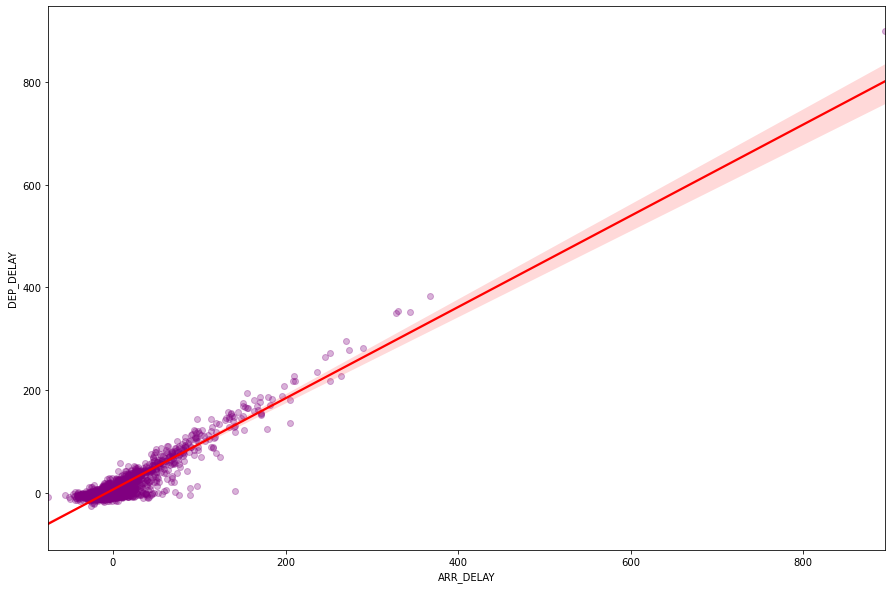

In [23]:
plt.figure(figsize=(15,10))
sns.regplot(x='ARR_DELAY', y='DEP_DELAY', data=data.sample(frac=0.015),
            scatter_kws={'color':'purple','alpha':0.3}, line_kws={'color':'red'}, dropna=True)

An interesting study might be the delay of flights depending on the different periods during the year, the month or the week. For instance, we can see the accumulated delay by month:

In [24]:
df_arr_delay = df[df['ARR_DELAY'].notna()]
y = df_arr_delay.groupby(by=['MONTH'])['ARR_DELAY'].sum()
print(y)
x = month.unique()
x.sort()

MONTH
1      61514.0
2     126227.0
3      43807.0
4      81437.0
5     120102.0
6     199381.0
7     139623.0
8     117534.0
9       4869.0
10     39837.0
11      6097.0
12    103320.0
Name: ARR_DELAY, dtype: float64


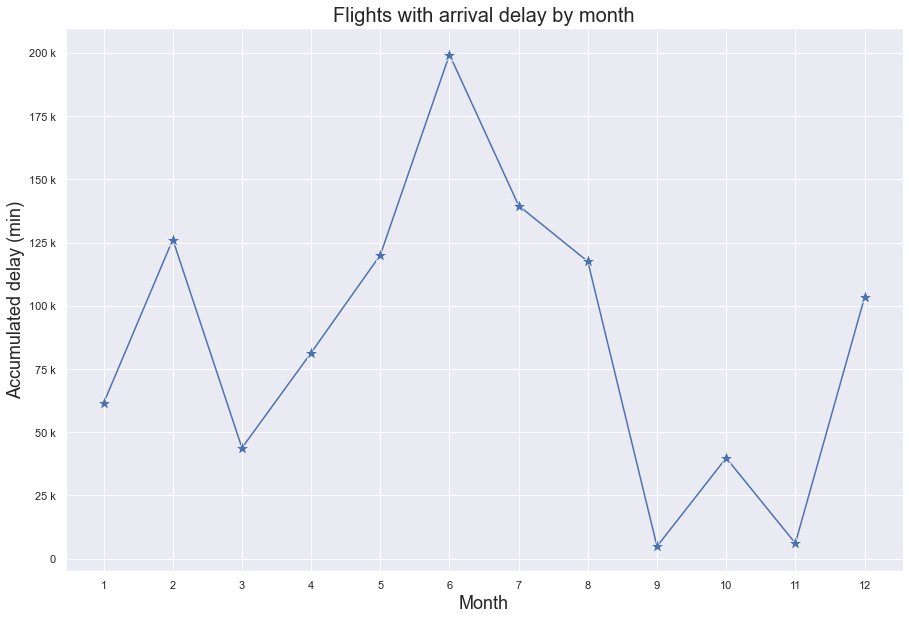

In [25]:
sns.set(rc={'figure.figsize':(15,10)})
ax = sns.lineplot(x=x, y=y, palette='pastel', marker='*', markersize=14)
ax.set_title('Flights with arrival delay by month', fontsize=20)
ax.set_xlabel('Month', fontsize=18)
ax.set_ylabel('Accumulated delay (min)', fontsize=18)
ax.xaxis.set_major_locator(md.DayLocator(interval=1))
ax.set(ylim=(-5000, 210000))
ax.yaxis.set_major_formatter(ticker.EngFormatter())

For convenience, we are going to write a logic statement that determines if a flight is *delayed* or *not*, and we will store the results in a new column called 'delayed'.

In [26]:
data.loc[data['ARR_DELAY'] < 15, 'delayed'] = False
data.loc[data['ARR_DELAY'] >= 15, 'delayed'] = True
delayed_mean = data.groupby(by = 'delayed')['ARR_DELAY'].mean()
delayed_mean.head()

delayed
False    -9.625935
True     70.127049
Name: ARR_DELAY, dtype: float64

In addition to the *delayed-or-not* case, it might be helpful to create a *status* to differenciate further:

In [27]:
data.loc[data['ARR_DELAY'] <= 15, 'status'] = 0
data.loc[data['ARR_DELAY'] >= 15, 'status'] = 1
data.loc[data['ARR_DELAY'] >= 60, 'status'] = 2

Summary of *status*:

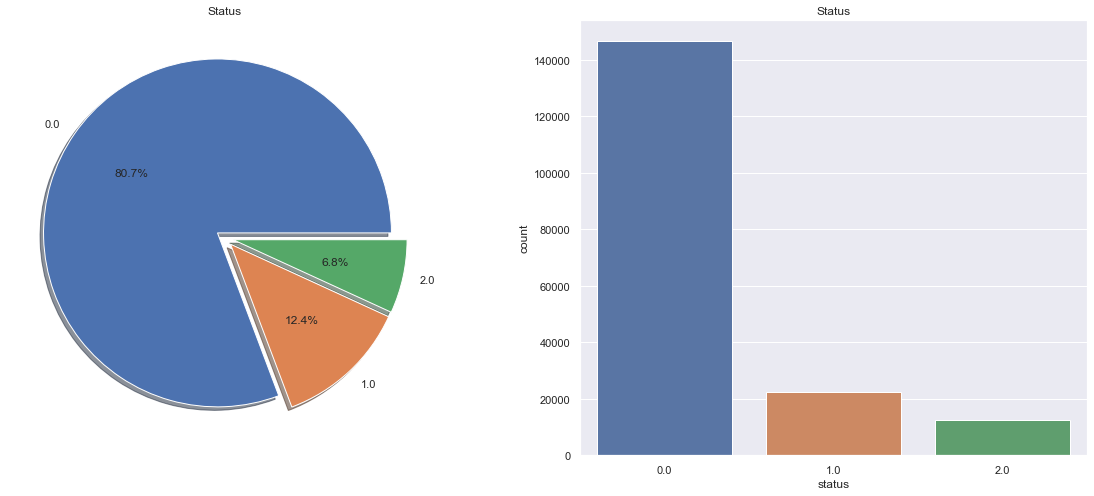

Status: the flight was on time (0), slightly delayed (1) or highly delayed (2)


In [28]:
f,ax = plt.subplots(1,2,figsize=(20,8))
data['status'].value_counts().plot.pie(explode=[0.05,0.05,0.05],
                                       autopct='%1.1f%%',
                                       ax=ax[0],
                                       shadow=True)
ax[0].set_title('Status')
ax[0].set_ylabel('')
sns.countplot('status', order=data['status'].value_counts().index, data=data, ax=ax[1])
ax[1].set_title('Status')
plt.show()

print('Status: the flight was on time (0), slightly delayed (1) or highly delayed (2)')

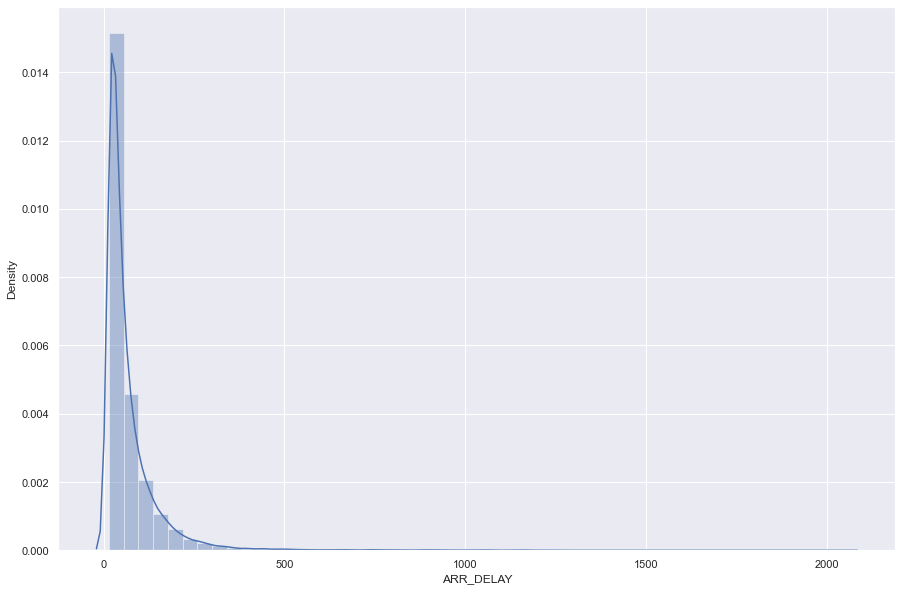

In [29]:
data_delayed = data[data.status >= 1]
sns.distplot(data_delayed['ARR_DELAY'])
plt.show()

In [30]:
print('Skewness: %f' % data_delayed['ARR_DELAY'].skew())
print('Kurtosis: %f' % data_delayed['ARR_DELAY'].kurt())

Skewness: 6.075646
Kurtosis: 59.067009


It can be seen on the histogram and by the skewness and kurtosis indexes, that delays are mostly located on the left side of the graph, with a long tail to the right. The majority of delays are short, and the longer delays, while unusual, are more heavy loaded in time.

Let's now focus on all quantitative features... We pick only the columns with pure quantitative information.

In [31]:
x = data[['ARR_DELAY','DEP_DELAY','TAXI_OUT','TAXI_IN','ACTUAL_ELAPSED_TIME','AIR_TIME',
          'DISTANCE','CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY',
          'SECURITY_DELAY','LATE_AIRCRAFT_DELAY']].fillna(0)
pd.options.mode.chained_assignment = None  # default='warn'
x.loc[x['ARR_DELAY'] < 15, 'delayed'] = False
x.loc[x['ARR_DELAY'] >= 15, 'delayed'] = True
y = x[['delayed']]

For some of the plots we aim to do, the amount of data we currently have is just too large. Thus, we replicate the previous instructions but only for the first 1000 rows.

In [32]:
x_vis = data[['ARR_DELAY','DEP_DELAY','TAXI_OUT','TAXI_IN','ACTUAL_ELAPSED_TIME','AIR_TIME',
          'DISTANCE']].fillna(0).head(1000)
pd.options.mode.chained_assignment = None  # default='warn'
x_vis.loc[x_vis['ARR_DELAY'] < 15, 'delayed'] = False
x_vis.loc[x_vis['ARR_DELAY'] >= 15, 'delayed'] = True
y_vis = x_vis[['delayed']]

We also divide the features to be represented in two different groups, according to expected relationships between data, to make it easier to visualize.
Note: we rule out for now the features CARRIER_DELAY, WEATHER_DELAY, NAS_DELAY, SECURITY_DELAY and LATE_AIRCRAFT_DELAY, since they are completely dependent on ARR_DELAY, as explained before.

In [33]:
x1 = x_vis[['DEP_DELAY','TAXI_OUT','TAXI_IN']].fillna(0)
x2 = x_vis[['ACTUAL_ELAPSED_TIME','AIR_TIME','DISTANCE']].fillna(0)

In [34]:
data_nor = (x - x.min()) / (x.max() - x.min())   # normalizations
data_nor1 = (x1 - x1.min()) / (x1.max() - x1.min())
data_nor2 = (x2 - x2.min()) / (x2.max() - x2.min())

In [35]:
data_nor.head()

,ARR_DELAY,DEP_DELAY,TAXI_OUT,TAXI_IN,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,delayed
68920,0.0385882,0.0227273,0.0828729,0.0282486,0.170904,0.148311,0.114731,0,0,0,0,0,0
546467,0.0334118,0.0241477,0.0883978,0.0564972,0.218927,0.189427,0.204976,0,0,0,0,0,0
128232,0.0536471,0.0364583,0.165746,0.0508475,0.254237,0.207048,0.182267,0.0186735,0,0.00812348,0,0,1
257264,0.0404706,0.030303,0.0441989,0.0225989,0.0847458,0.0704846,0.043049,0,0,0,0,0,0
68501,0.0221176,0.0203598,0.0552486,0.039548,0.0847458,0.0631424,0.0389021,0,0,0,0,0,0


In [36]:
new_data1 = pd.concat([y_vis, data_nor1], axis=1) # concat data to form new
new_data1 = pd.melt(new_data1, id_vars='delayed', var_name='features', value_name='value')
new_data2 = pd.concat([y_vis, data_nor2],axis=1)
new_data2 = pd.melt(new_data2, id_vars='delayed', var_name='features', value_name='value')
new_data1

,delayed,features,value
0,False,DEP_DELAY,0.036680
1,False,DEP_DELAY,0.042471
2,True,DEP_DELAY,0.092664
3,False,DEP_DELAY,0.067568
4,False,DEP_DELAY,0.027027
...,...,...,...
2995,True,TAXI_IN,0.244898
2996,False,TAXI_IN,0.061224
2997,False,TAXI_IN,0.122449
2998,False,TAXI_IN,0.163265


(array([0, 1, 2]),
 [Text(0, 0, 'DEP_DELAY'), Text(1, 0, 'TAXI_OUT'), Text(2, 0, 'TAXI_IN')])

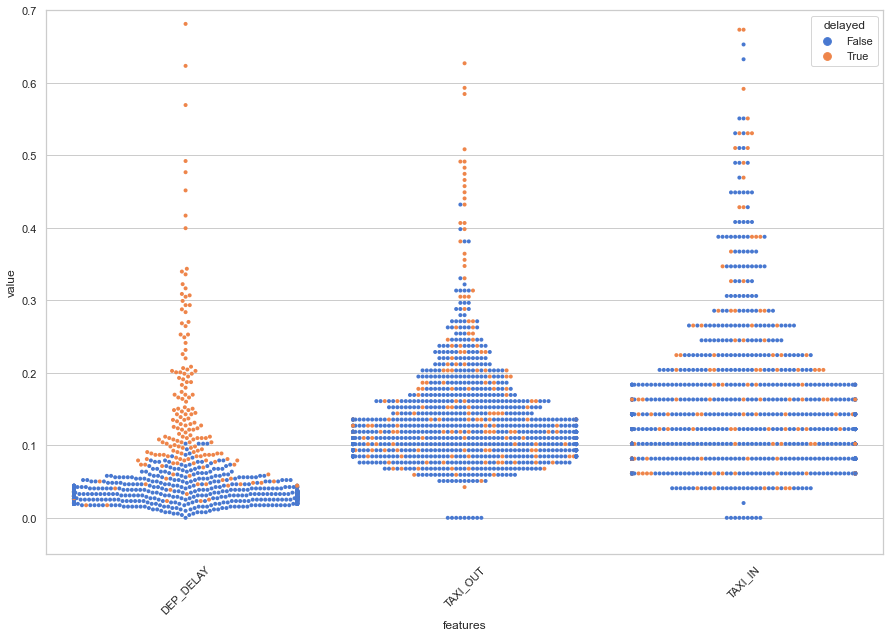

In [37]:
sns.set(style='whitegrid', palette='muted')
plt.figure(figsize=(15,10))
sns.swarmplot(x='features', y='value', hue='delayed', data=new_data1, s=4)
plt.ylim(-0.05, 0.7)
plt.xticks(rotation=45)

(array([0, 1, 2]),
 [Text(0, 0, 'ACTUAL_ELAPSED_TIME'),
  Text(1, 0, 'AIR_TIME'),
  Text(2, 0, 'DISTANCE')])

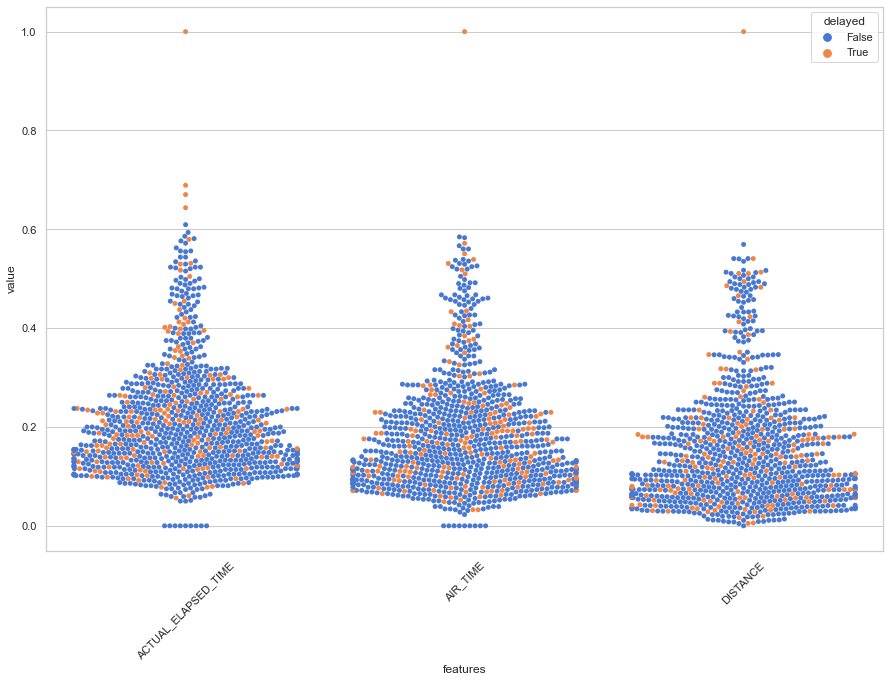

In [38]:
plt.figure(figsize=(15,10))
sns.swarmplot(x='features', y='value', hue='delayed', data=new_data2)
plt.xticks(rotation=45)

Plots Interpretation: from the above two graphs, we can hardly infer anything about the data. One can certainly observe in the first graph that, after a short period of time, all the flights that suffered a delay at departure (DEP_DELAY) became *delayed* in the sense defined by us. It is good to see this in the graph, but it is something we were expecting, no big news.
Also, we can see that in the first graph there are many missing points, which means that a lot of data is not shown here. So, is there any other interesting feature in terms of classification? If there was it, we need other means to find it.

Let's try other ways of visualization.

(array([0, 1, 2]),
 [Text(0, 0, 'DEP_DELAY'), Text(1, 0, 'TAXI_OUT'), Text(2, 0, 'TAXI_IN')])

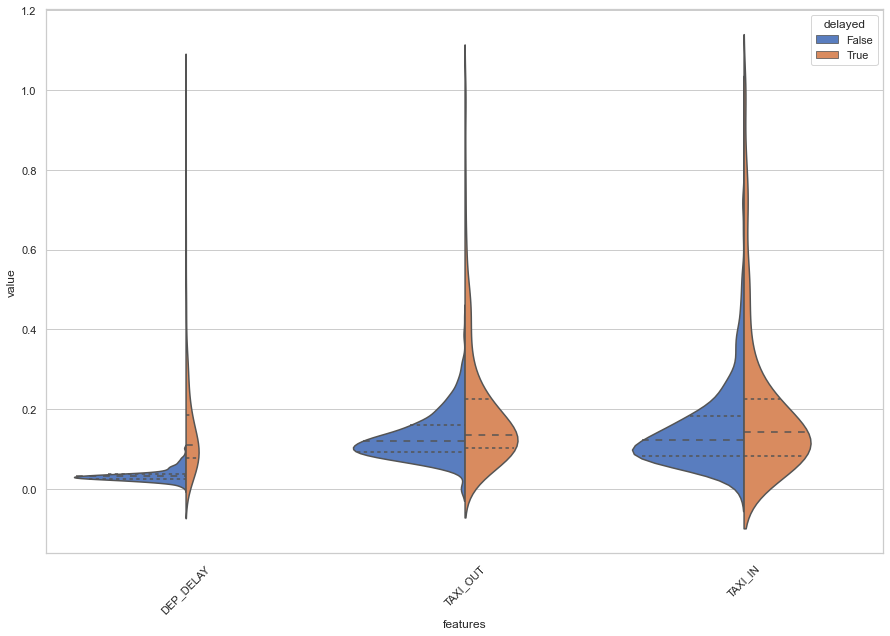

In [40]:
new_data1 = pd.concat([y_vis, data_nor1],axis=1)
new_data1 = pd.melt(new_data1, id_vars='delayed', var_name='features', value_name='value')
plt.figure(figsize=(15,10))
sns.violinplot(x='features', y='value', hue='delayed', data=new_data1, split=True, inner='quart')
plt.xticks(rotation=45)

(array([0, 1, 2]),
 [Text(0, 0, 'ACTUAL_ELAPSED_TIME'),
  Text(1, 0, 'AIR_TIME'),
  Text(2, 0, 'DISTANCE')])

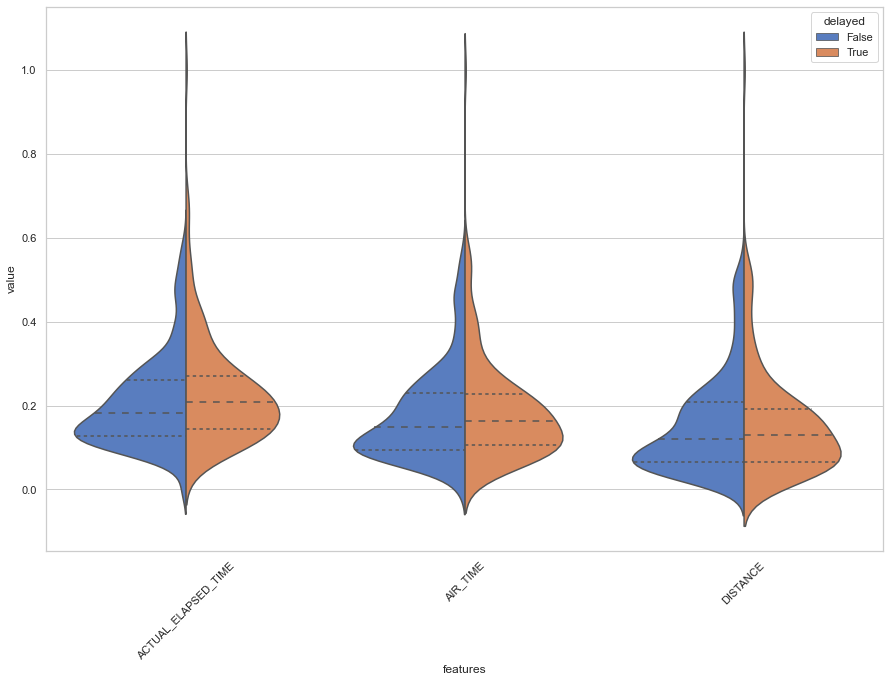

In [41]:
new_data2 = pd.concat([y_vis, data_nor2],axis=1)
new_data2 = pd.melt(new_data2, id_vars='delayed', var_name='features', value_name='value')
plt.figure(figsize=(15,10))
sns.violinplot(x='features', y='value', hue='delayed', data=new_data2, split=True, inner='quart')
plt.xticks(rotation=45)

Plot Interpretation: in the first violin graph, DEP_DELAY and TAXI_OUT have medians of true and false cases that seem to be far away from each other, so they can be good for classification. However, in TAXI_IN, the medians of the true and false cases do not look as much separated, so it might not give good information for classification.
In the second graph, none of them seems to have very unmatching medians between delayed and non-delayed flights. However, what we can observe is that all three of them are very similar to each other; if we could confirm this, that is, if we confirm that (some of) these features are very correlated, then we could drop some of them from our analysis.

One way to study the correclation of two features, is by using a scatter plot with line of regression. The dots in a scatter plot not only report the values of individual data points, but also patterns when the data are taken as a whole.

<AxesSubplot:xlabel='AIR_TIME', ylabel='DISTANCE'>

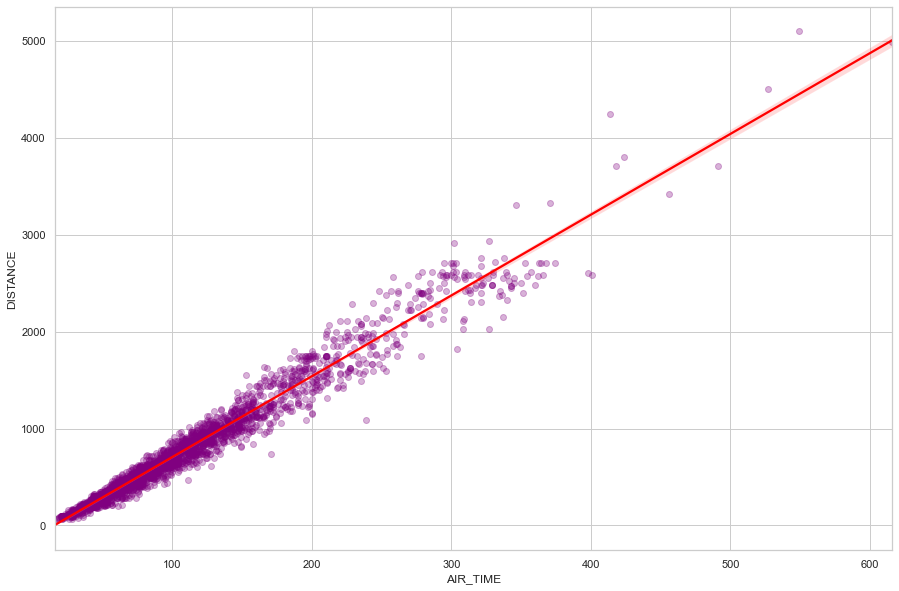

In [42]:
plt.figure(figsize=(15,10))
sns.regplot(x='AIR_TIME', y='DISTANCE', data=data.sample(frac=0.015),
            scatter_kws={'color':'purple','alpha':0.3}, line_kws={'color':'red'}, dropna = True)

<AxesSubplot:xlabel='ACTUAL_ELAPSED_TIME', ylabel='DISTANCE'>

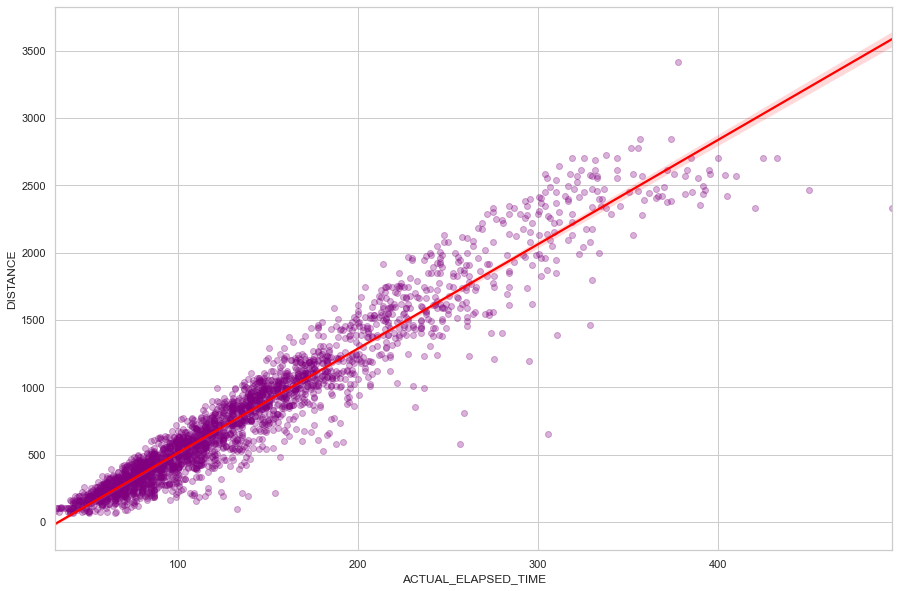

In [43]:
plt.figure(figsize=(15,10))
sns.regplot(x='ACTUAL_ELAPSED_TIME', y='DISTANCE', data=data.sample(frac=0.015),
            scatter_kws={'color':'purple','alpha':0.3}, line_kws={'color':'red'}, dropna=True)

It seems that, even though we have lots of points in our plots (one could run into overplotting), the huge majority of them follow the same linear pattern.

Let's try to look at other features in order to anticipate some correlations:

* First, in the next two plots, we see that flights from 3pm onwards are more likely to be delayed than morning flights, as well as flights with a larger distance to cover.

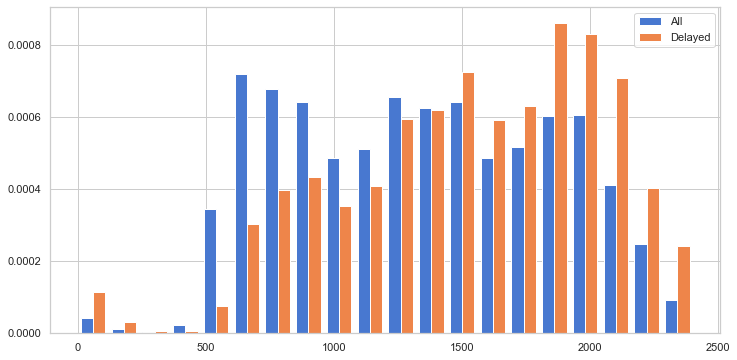

In [44]:
fig, ax = plt.subplots(figsize = (12,6))
delayed = data[data['delayed'] == True]
ax.hist([data['DEP_TIME'], delayed['DEP_TIME']], density=True, bins=20, label=['All', 'Delayed'])

plt.legend()
plt.show()

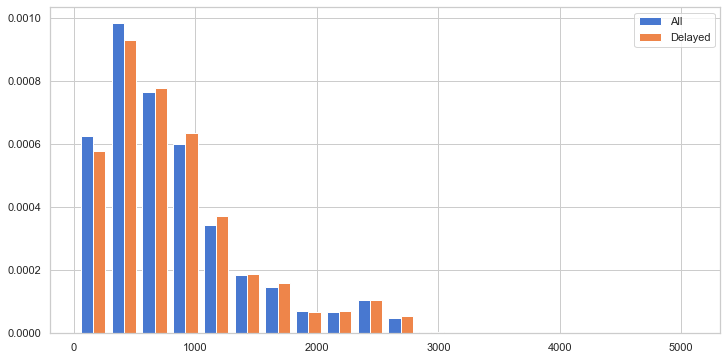

In [45]:
fig, ax = plt.subplots(figsize = (12,6))
ax.hist([data['DISTANCE'], delayed['DISTANCE']], density=True, bins=20, label=['All', 'Delayed'])

plt.legend()
plt.show()

* Now, we are going to plot how many flights got *delayed* by *day of the week*, by *day of the month*, and by *month*. Along with these, we show violin plots for each of the temporal series with the ARR_DELAY and the category 'delay'

In [46]:
dayofweek = data['FL_DATE'].dt.dayofweek
dayofmonth = data['FL_DATE'].dt.day

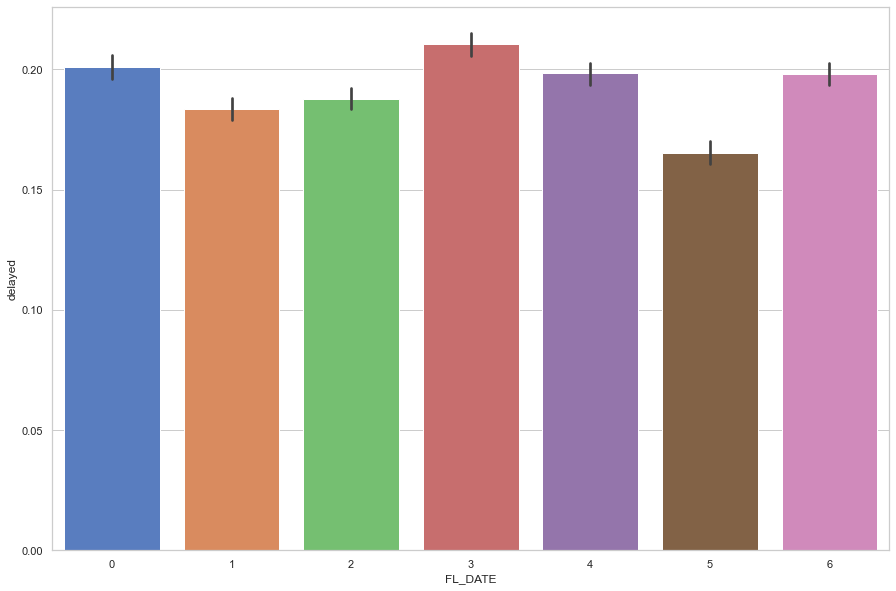

In [47]:
plt.figure(figsize=(15,10))
sns.barplot(data=data, x=dayofweek, y='delayed')

plt.show()

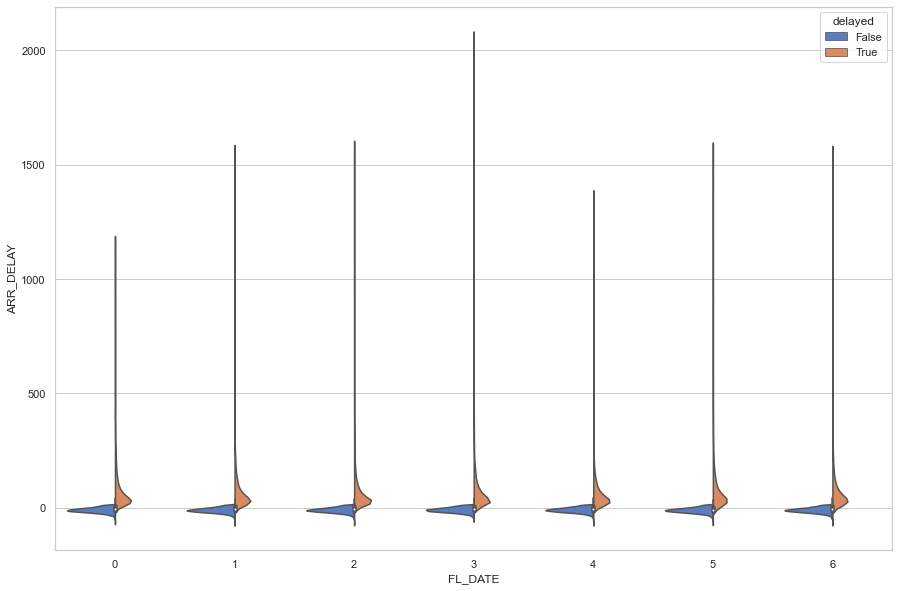

In [48]:
plt.figure(figsize=(15,10))
sns.violinplot(data=data, x=dayofweek, y='ARR_DELAY', hue='delayed', split=True)
plt.show()

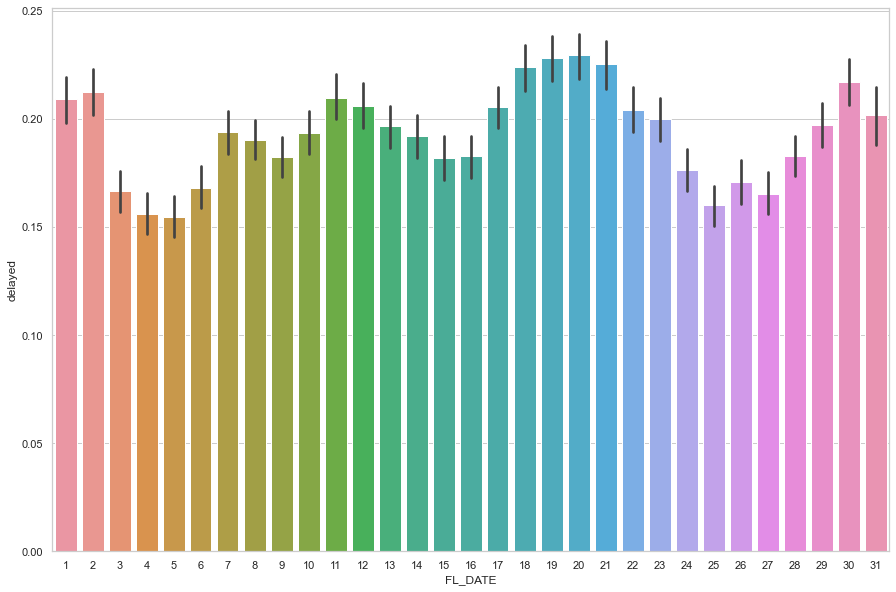

In [49]:
plt.figure(figsize=(15,10))
sns.barplot(data=data, x=dayofmonth, y='delayed')

plt.show()

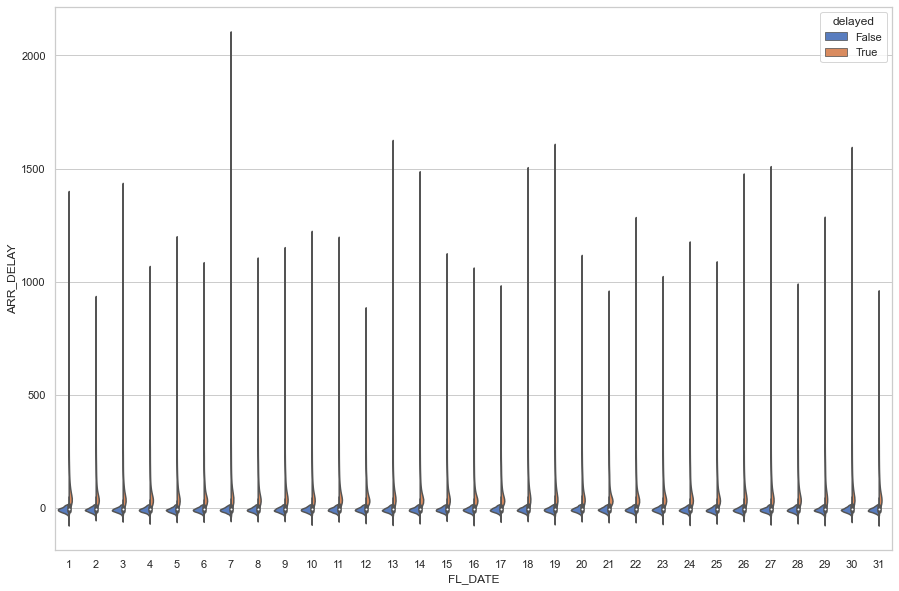

In [50]:
plt.figure(figsize=(15,10))
sns.violinplot(data=data, x=dayofmonth, y='ARR_DELAY', hue='delayed', split=True)
plt.show()

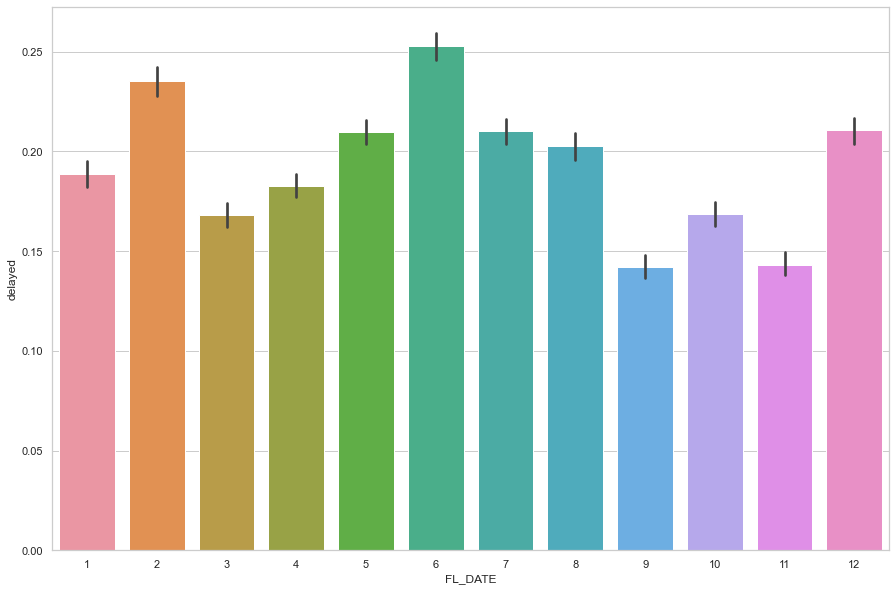

In [51]:
plt.figure(figsize=(15,10))
sns.barplot(data=data, x=month, y='delayed')

plt.show()

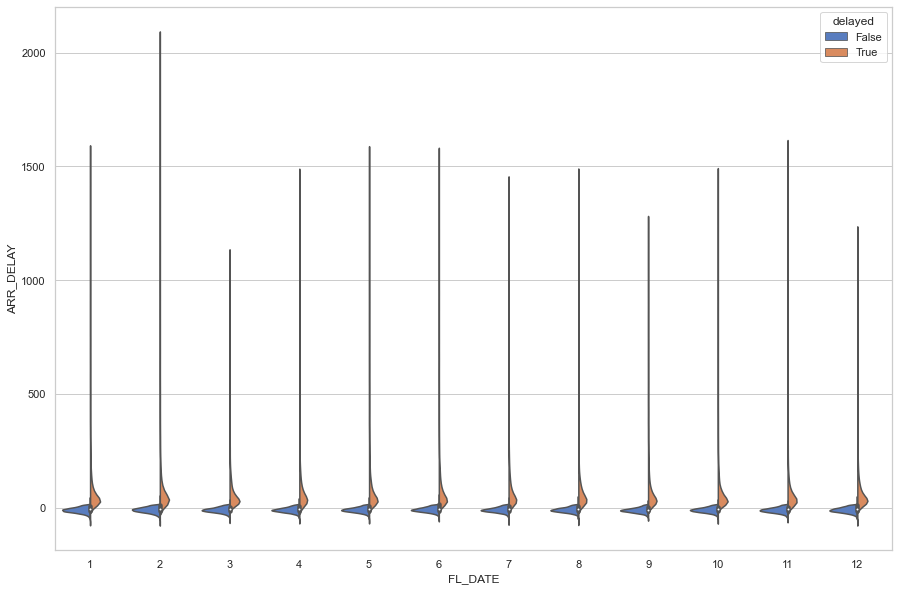

In [52]:
plt.figure(figsize=(15,10))
sns.violinplot(data=data, x=month, y='ARR_DELAY', hue='delayed', split=True)
plt.show()

* Next, we plot a violinplot with the ARR_DELAY and the category 'delayed', setting ORIGIN and DEST  to be the main 5 airports in terms of traffic in the USA.

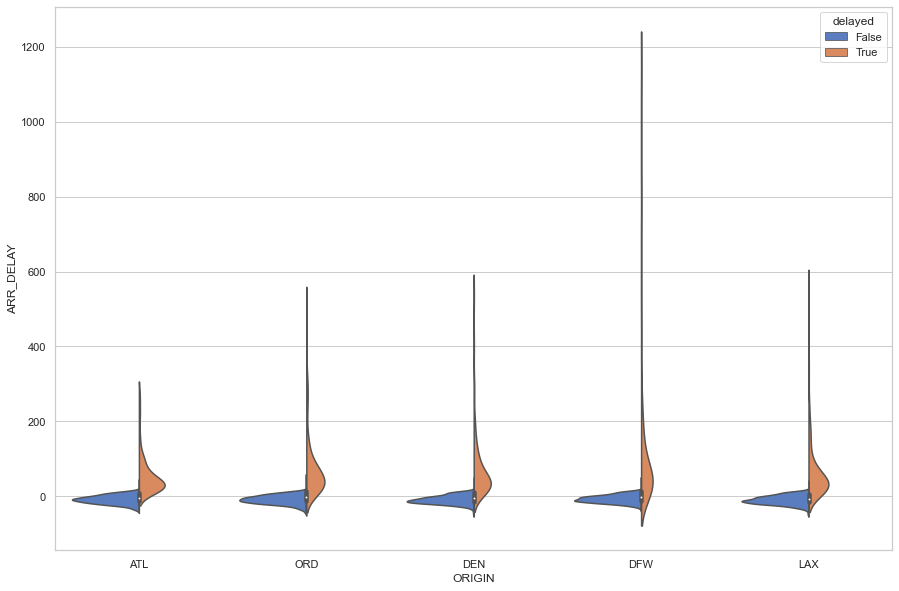

In [53]:
airports = ['ATL', 'ORD', 'DEN', 'DFW', 'LAX']
data_airports = data[(data['ORIGIN'].isin(airports)) & 
                          (data['DEST'].isin(airports))]
plt.figure(figsize=(15,10))
sns.violinplot(data=data_airports, x='ORIGIN', y='ARR_DELAY', hue='delayed', split=True)
plt.show()

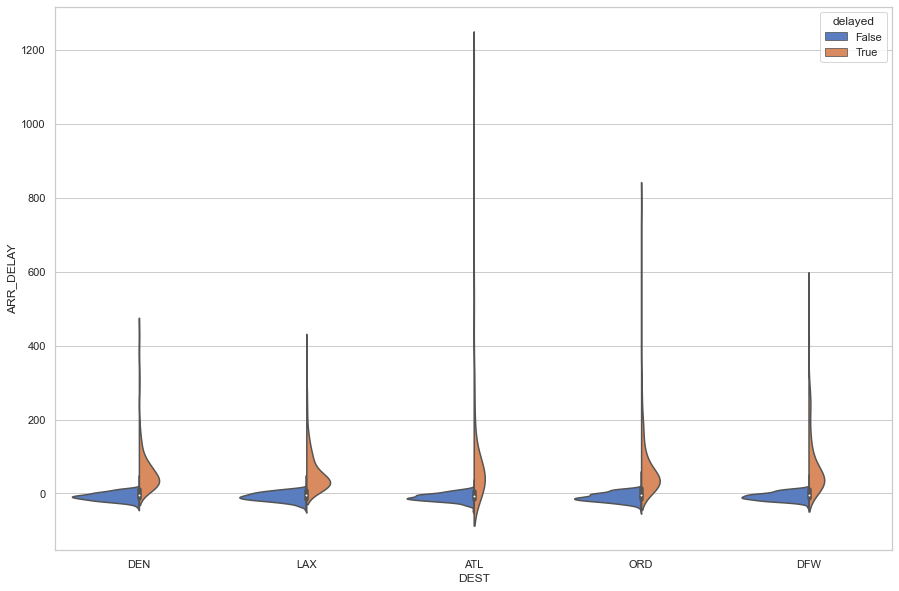

In [54]:
plt.figure(figsize=(15,10))
sns.violinplot(data=data_airports, x='DEST', y='ARR_DELAY', hue='delayed', split=True)
plt.show()

As one could expect, the flights with higher delays come from airports with higher air traffic:

In [55]:
gb_origins = df_clean.groupby(by = 'ORIGIN', sort=True)[['DEP_DELAY','ARR_DELAY']].sum().reset_index()
gb_origins = gb_origins.sort_values(by = ['DEP_DELAY', 'ARR_DELAY'], ascending=[False,False])
print(gb_origins)

    ORIGIN  DEP_DELAY  ARR_DELAY
247    ORD  4839205.0  3830325.0
94     DFW  3882297.0  2938391.0
21     ATL  3461448.0   866880.0
93     DEN  3360037.0  2058593.0
197    LGA  2502778.0  1461347.0
..     ...        ...        ...
358    YAK    -3858.0    -3141.0
52     BRW    -5070.0    -4384.0
245    OME    -5375.0    -4583.0
303    SCC    -6792.0    -5524.0
117    FAI    -9477.0   -26152.0

[360 rows x 3 columns]


We will try to explore more carefully in ETL and Feature Eng the influence of ORIGIN and DEST in the rest of the data, to see if we can use in our model.

***

Let's try to find out the correlations between all features, which will be useful later on in feature selection for the predictive model.
First, we prepare the data:

In [56]:
cols = ['YEAR','MONTH','DAY_OF_MONTH','DAY_OF_WEEK','FL_DATE']
data_heatmap = df.drop(cols, axis=1).fillna(0)
data_heatmap['month'] = month
data_heatmap['day-of-month'] = dayofmonth
data_heatmap['day-of-week'] = dayofweek
# convert all the columns in float to integer for correlation plot
for y in data_heatmap.columns:
    if(data_heatmap[y].dtype == np.float64):
        data_heatmap[y] = data_heatmap[y].astype(np.int64)
data_heatmap.dtypes

ORIGIN                 object
DEST                   object
DEP_TIME                int64
DEP_DELAY               int64
TAXI_OUT                int64
TAXI_IN                 int64
ARR_TIME                int64
ARR_DELAY               int64
CANCELLED               int64
ACTUAL_ELAPSED_TIME     int64
AIR_TIME                int64
DISTANCE                int64
CARRIER_DELAY           int64
WEATHER_DELAY           int64
NAS_DELAY               int64
SECURITY_DELAY          int64
LATE_AIRCRAFT_DELAY     int64
month                   int64
day-of-month            int64
day-of-week             int64
dtype: object

Next, we use the *dython* package (which works with Python 3.0 and later) (Zychlinski, 2018) to plot a correlations heatmap including also the nominal features 'ORIGIN' and 'DEST':

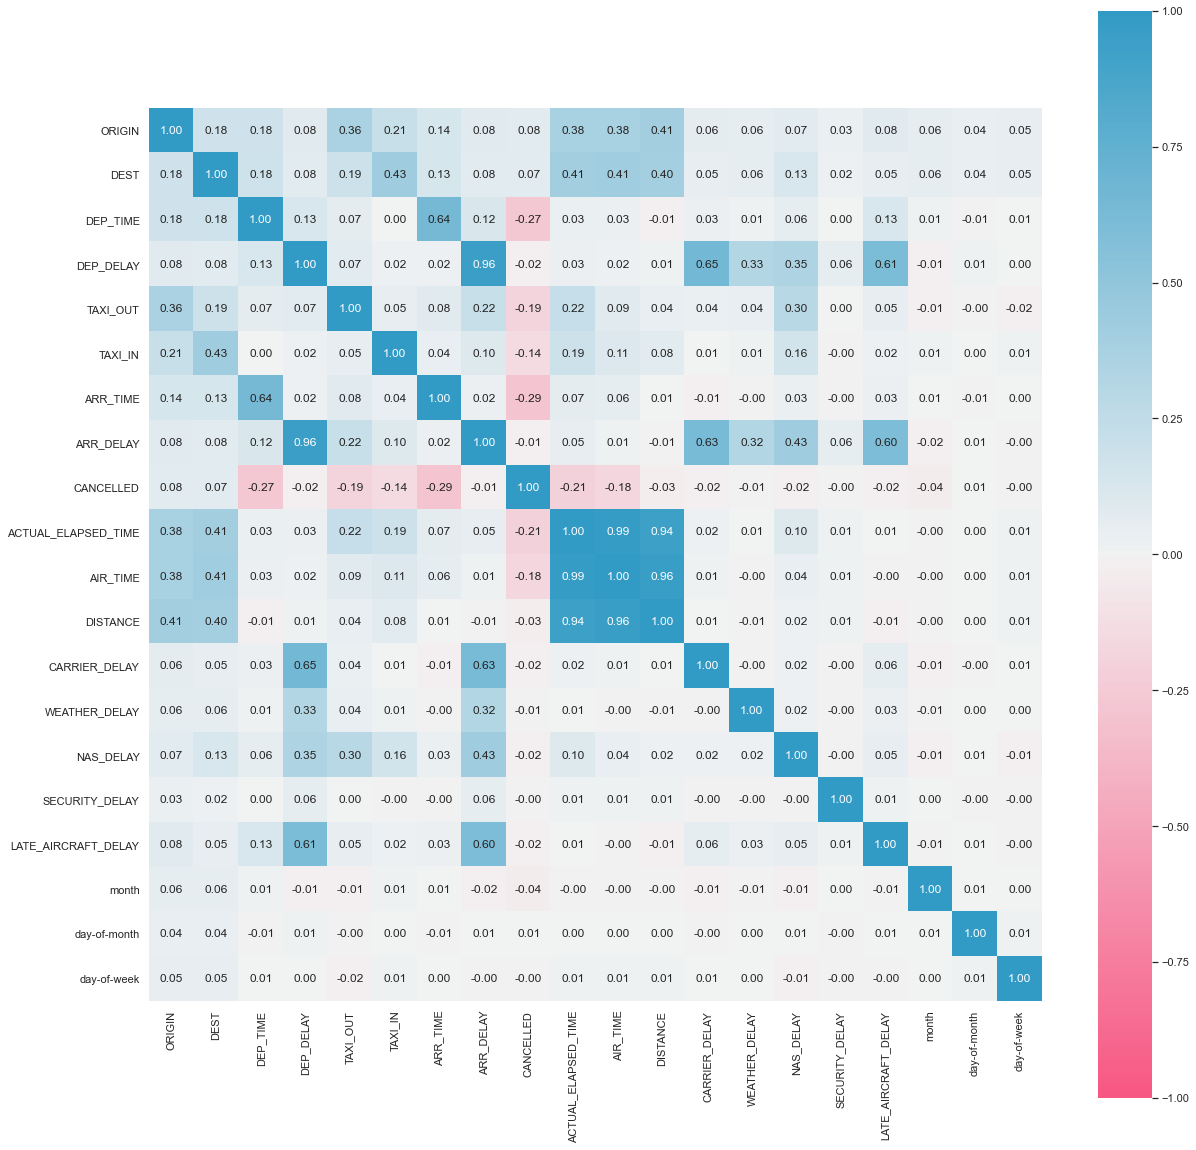

{'corr':                        ORIGIN      DEST  DEP_TIME  DEP_DELAY  TAXI_OUT  \
 ORIGIN               1.000000  0.179327  0.178528   0.079062  0.364330   
 DEST                 0.179327  1.000000  0.180255   0.075826  0.193079   
 DEP_TIME             0.178528  0.180255  1.000000   0.128810  0.065353   
 DEP_DELAY            0.079062  0.075826  0.128810   1.000000  0.071165   
 TAXI_OUT             0.364330  0.193079  0.065353   0.071165  1.000000   
 TAXI_IN              0.213528  0.426705  0.000512   0.016353  0.048155   
 ARR_TIME             0.135846  0.133186  0.644887   0.021521  0.079366   
 ARR_DELAY            0.084154  0.077691  0.121940   0.960001  0.217402   
 CANCELLED            0.077922  0.073558 -0.272157  -0.017911 -0.189725   
 ACTUAL_ELAPSED_TIME  0.381240  0.409594  0.034262   0.026388  0.223240   
 AIR_TIME             0.379782  0.414751  0.026191   0.016187  0.085082   
 DISTANCE             0.406764  0.404987 -0.011219   0.013941  0.042254   
 CARRIER_DELAY   

In [57]:
from dython.model_utils import roc_graph
from dython.nominal import associations

plt.rcParams['figure.figsize'] = 20,20
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
associations(data_heatmap, nominal_columns=['ORIGIN','DEST'], cmap=cmap)

It looks like the only strong correlations here are ARR_DELAY with DEP_DELAY (as one could obviously expect), and these two with CARRIER_DELAY, WEATHER_DELAY, NAS_DELAY, SECURITY_DELAY, and LATE_AIRCRAFT_DELAY, but recall that these features are just the cause of an actual delay, which means that we already knew the interrelation.
Beside this, one can observe that our previous analysis was right: there is a strong correlation between ACTUAL_ELAPSED_TIME, AIR_TIME and DISTANCE. Later on, we will drop ACTUAL_ELAPSED_TIME and DISTANCE, and work only with AIR_TIME.